In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import sys

# Custom functions

sys.path.insert(1, '../src')
from custom_plots import *


# Options
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
%matplotlib inline
sns.set_theme(style="white")

# Convenience for working with external src code files
%load_ext autoreload
%autoreload 2


# NOTE THAT SETTING THESE PARAMETERS ELIMINATES "MASK" FUNCTIONALITY ON CMAP
# FONT_SIZE=20
# sns.set(rc={
#     'figure.figsize': (df.shape[1]/2,df.shape[1]/3),
#     'font.size': FONT_SIZE,
#     'axes.titlesize': FONT_SIZE, 
#     'xtick.labelsize': FONT_SIZE, 
#     'ytick.labelsize': FONT_SIZE,
#     'axes.labelsize': FONT_SIZE})

## Import protest data

In [2]:
# Import data from Modeling notebook
engine = create_engine('sqlite:///../data/processed/all_data.db')
with engine.begin() as connection:
    df = pd.read_sql('SELECT * FROM all_modeled_data', connection)
    
df['target_categorical'] = ['Revolution' if x == 1 else "No Revolution" for x in df.target]
df['target30'] = df.alternative_target < 30
df['target90'] = df.alternative_target < 90
df['target180'] = df.alternative_target < 180
df['target365'] = df.alternative_target < 365
df['target_alltime'] = df.alternative_target
df.drop(['target', 'alternative_target'], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14558 entries, 0 to 14557
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   region                             14558 non-null  object 
 1   protestnumber                      14558 non-null  int64  
 2   protesterviolence                  14558 non-null  int64  
 3   duration_days                      14558 non-null  int64  
 4   participants                       14558 non-null  int64  
 5   participants_category              14558 non-null  object 
 6   demand_labor-wage-dispute          14558 non-null  int64  
 7   demand_land-farm-issue             14558 non-null  int64  
 8   demand_police-brutality            14558 non-null  int64  
 9   demand_political-behavior/process  14558 non-null  int64  
 10  demand_price-increases/tax-policy  14558 non-null  int64  
 11  demand_removal-of-politician       14558 non-null  int

In [3]:
demands = ['demand_labor-wage-dispute', 'demand_land-farm-issue', 'demand_police-brutality', 'demand_political-behavior/process', 'demand_price-increases/tax-policy', 'demand_removal-of-politician', 'demand_social-restrictions']
binary = demands + ['protesterviolence', 'finittrm', 'military', 'legelec', 'exelec']

continuous = ['protestnumber', 'duration_days', 'participants', 'yrsoffc', 'totalseats', 'startyear', 'liec', 'eiec', 'numvote', 'oppvote', 'gq', 'tensys_strict', 'stabs_strict']
categorical = ['region', 'participants_category', 'system']
targets = ['target30', 'target90', 'target180', 'target365', 'target_categorical', 'target_alltime']

remainders = df.drop(continuous+categorical+binary+targets, axis=1).columns

if remainders.shape==(0,):
    print("All features successfully bucketed")
else:
    print('Remaining columns to be assigned to various bucket:')
    for col in remainders:
        print(col, '\n', df[col].value_counts(), '\n')

All features successfully bucketed


## Correlation matrix

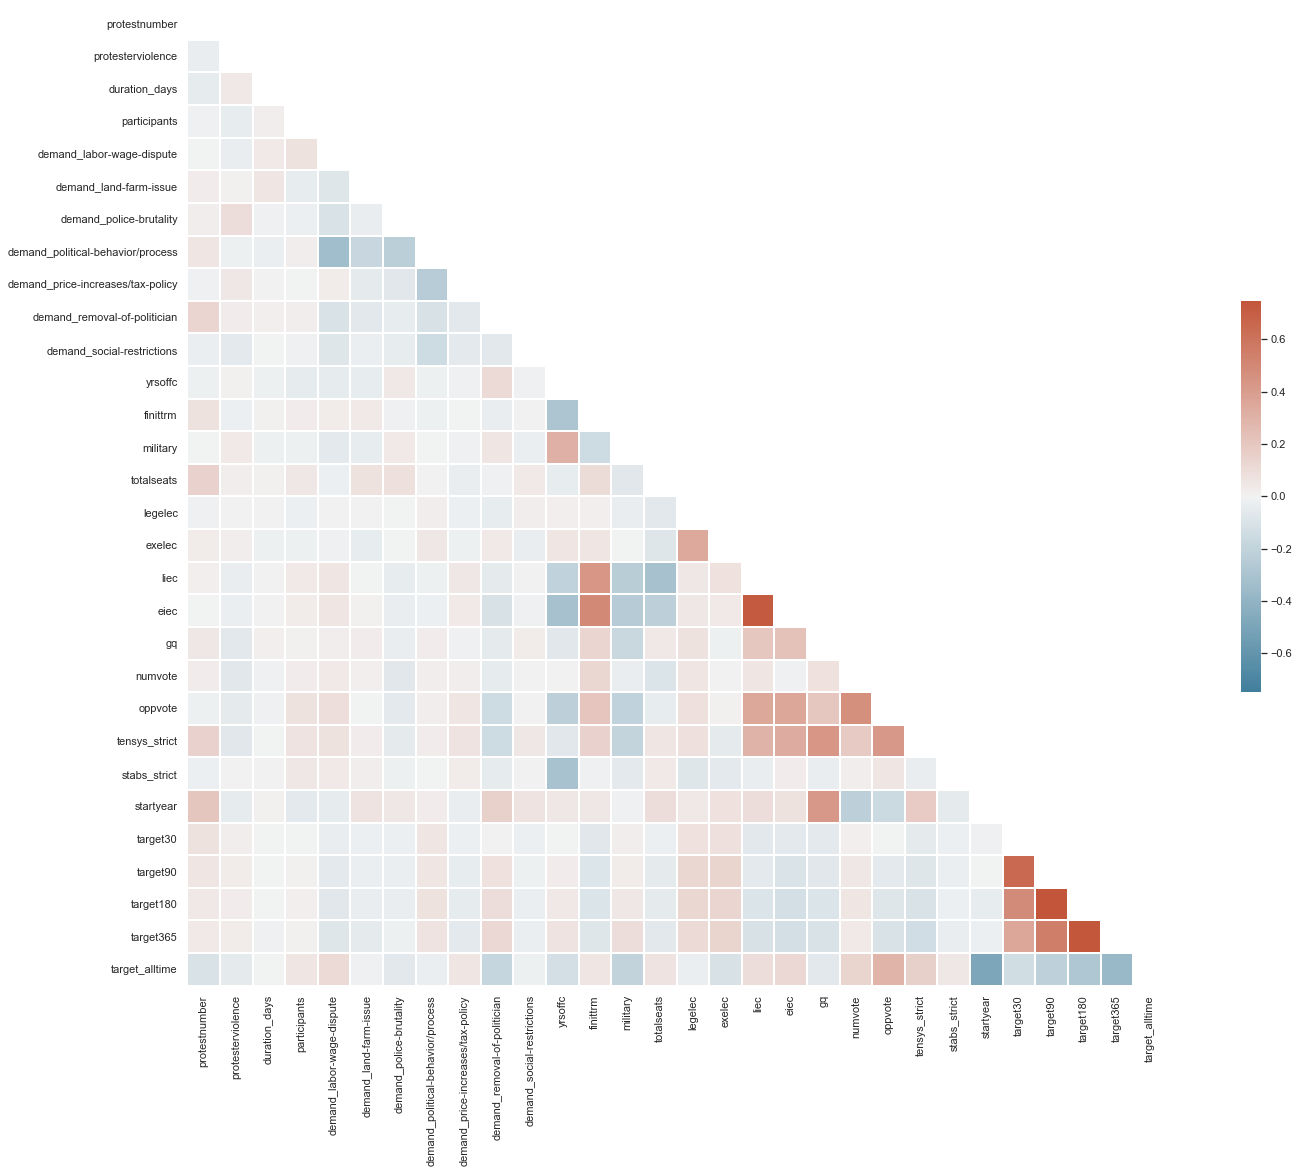

In [4]:
custom_plot_matrix(df)

### Protestnumber

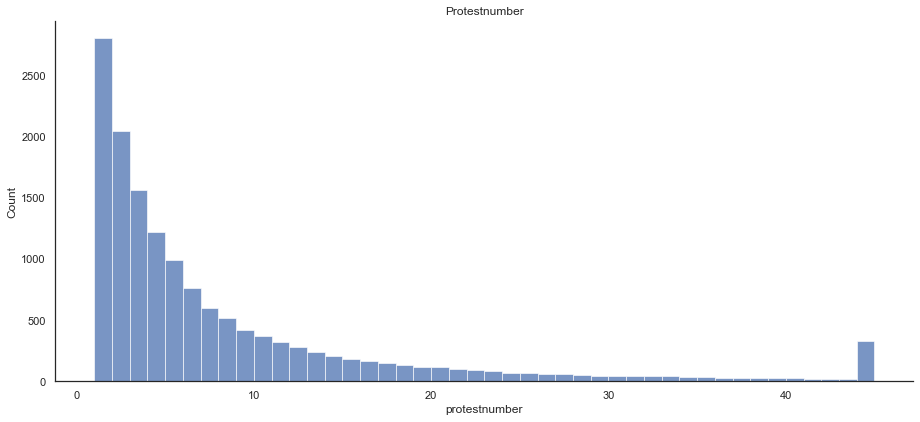

In [5]:
fig = sns.displot(df.protestnumber, bins=(df.protestnumber.max() - df.protestnumber.min()))
fig.fig.set_figwidth(15)
fig.fig.set_figheight(6)
plt.title('Protestnumber');

### Protest start year

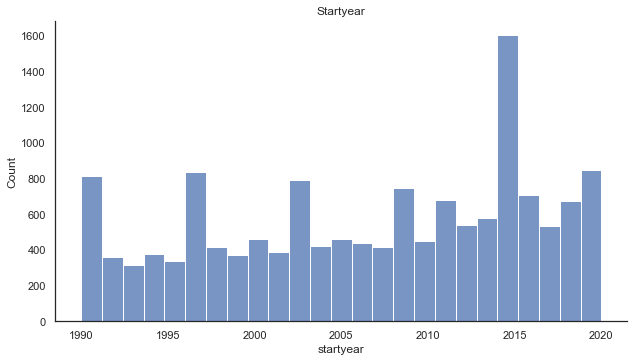

In [6]:
fig = sns.displot(df.startyear)
fig.fig.set_figwidth(10)
fig.fig.set_figheight(5)
plt.title('Startyear');

### Protest duration

Value counts (top 10):
 1     12599
2       700
3       299
4       157
5       107
8        69
6        64
7        50
9        41
15       36
Name: duration_days, dtype: int64


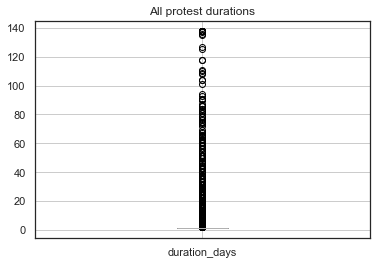

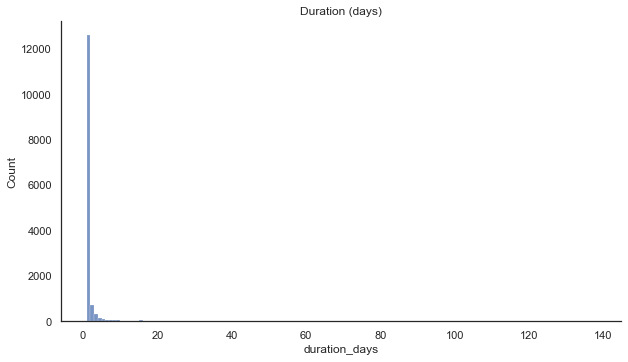

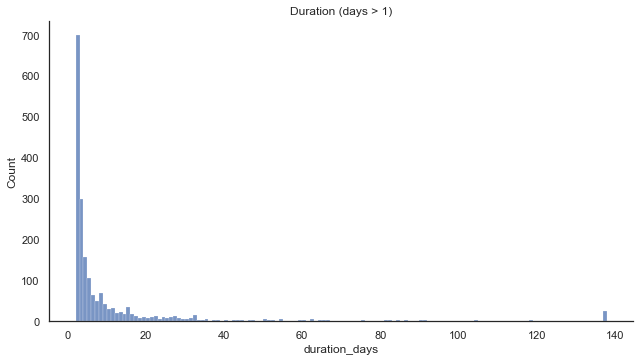

In [7]:
# Boxplot
print('Value counts (top 10):\n', df.duration_days.value_counts()[:10])
plt.figure()
pd.DataFrame(df.duration_days).boxplot()
plt.title('All protest durations')

# All values
fig = sns.displot(df.duration_days, bins=(df.duration_days.max() - df.duration_days.min()))
fig.fig.set_figwidth(10)
fig.fig.set_figheight(5)
plt.title('Duration (days)');


# All values > 1
more_than_one_day = df.loc[df.duration_days>1, 'duration_days']
fig = sns.displot(more_than_one_day, bins=(more_than_one_day.max() - more_than_one_day.min()))
fig.fig.set_figwidth(10)
fig.fig.set_figheight(5)
plt.title('Duration (days > 1)');

### Participant counts

Value counts (top 20):
 50        3095
100       2496
1000      2199
10000     1033
200        426
2000       379
549        338
500        312
300        301
5000       288
3000       252
3499       214
7500       203
20000      186
100000     180
150        142
357183     140
400        134
4000       132
74         111
Name: participants, dtype: int64


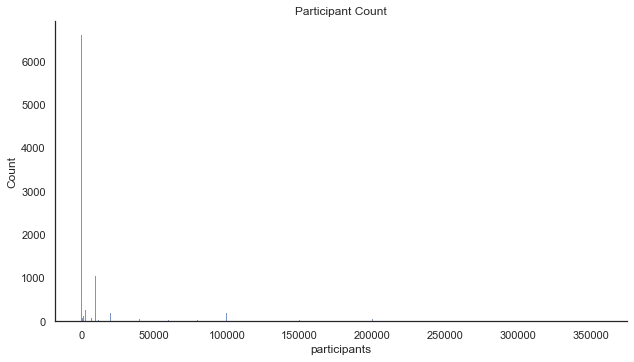

In [8]:
# Participant count
print('Value counts (top 20):\n', df.participants.value_counts()[:20])

fig = sns.displot(df.participants)
fig.fig.set_figwidth(10)
fig.fig.set_figheight(5)
plt.title('Participant Count');

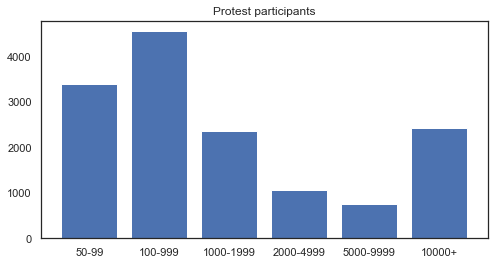

In [9]:
categories = ['50-99', '100-999', '1000-1999', '2000-4999', '5000-9999', '10000+']
participants = []

lookup = dict(df.participants_category.value_counts())
for category in categories:
    participants.append(lookup[category])

plt.figure(figsize=(8, 4))
plt.title('Protest participants')
plt.bar(categories, participants);

### Protester Demands

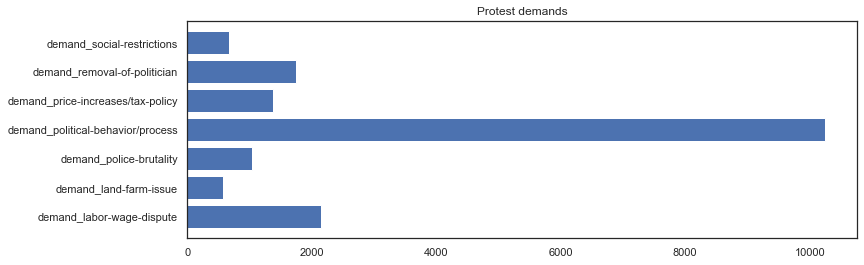

In [10]:
plt.figure(figsize=(12, 4))
plt.barh(df[demands].sum().index, df[demands].sum().values)
plt.title('Protest demands');

 **Target:** We see that the protester demand for "removal of politician" is most strongly correlated with an impending revolution. 
 
 **Alternative target:** We see that the rem

In [13]:
custom_plot_matrix(df[demands+targets], max_corr=0.2)

TypeError: custom_plot_matrix() got an unexpected keyword argument 'max_corr'

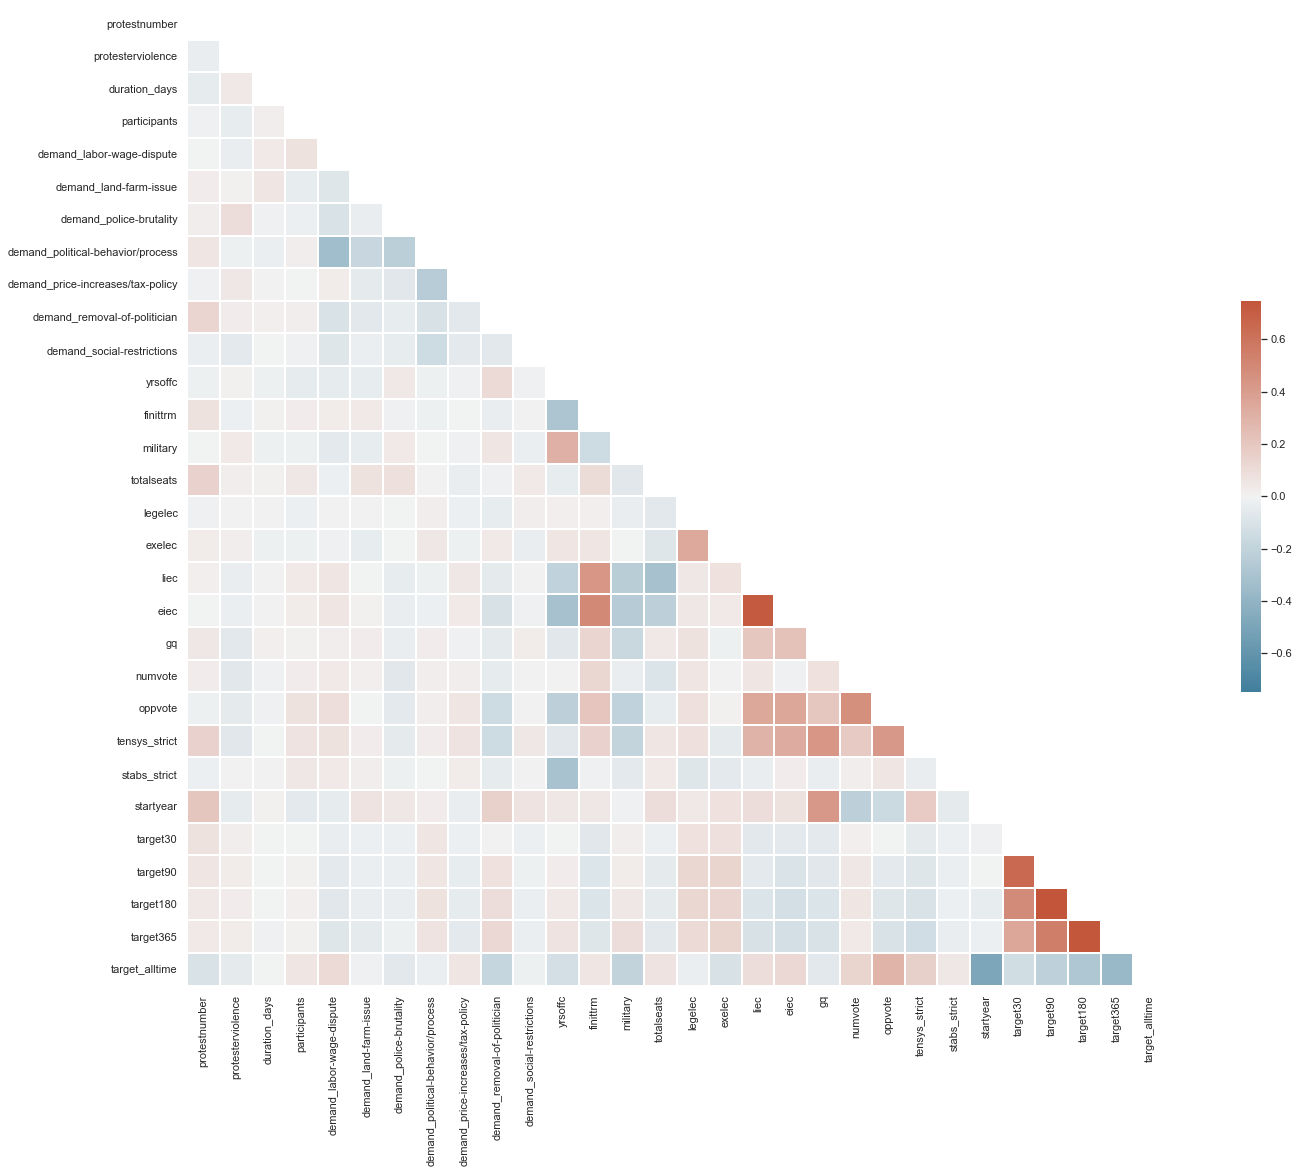

In [33]:
## Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Ensure negative and positive distances to zero are the absolute same
max_corr = corr.replace(1.0, 0).abs().max().max()

# Draw the heatmap with the mask and correct aspect ratio
SIZE = 1.8
plt.figure(figsize=(SIZE*corr.shape[1]/2, SIZE*corr.shape[1]/3))
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, vmax=max_corr, vmin=-max_corr, 
            square=True, linewidths=1, cbar_kws={"shrink": .4})
plt.show()

In [ ]:
sns.catplot(x='startyear', y='target_categorical',kind="violin", data=df)

In [ ]:
df.protestnumber.max()

df.loc[df.protestnumber==143]

In [ ]:
sns.pairplot(df)

In [ ]:
sns.catplot(y='military', x='protesterviolence',kind="violin", hue='target_categorical', data=df)

#plt.scatter(data=df, x='startyear', y='participants')

In [ ]:
plt.rcParams['figure.figsize'] = 12,10
sns.catplot(x=demands[0], y="startyear", data=df, kind='swarm')

In [ ]:
# figure size in inches


In [ ]:
plt.scatter(df[demands[0]], df['alternative_target'])

In [ ]:
# Compute the correlation matrix
corr = df[demands+['target']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});